In [1]:
#
#
# FINAL CAPSTONAE PROJECT MICK BROOKES
#
# Import Libraries
#
# Set up F sqaure ACCESS
#
# Read wIki for all areas
#
# USe Four Sqaure to read amenities
# 
# Set UP CSV read
#  Read house prices
#  Read Blue / Natural space
#  Read Salareis
#  Read Age groups
#  Read Life expecancy
#
# Plot house prices and salry
# Add prices to df final
# PRoduce regession reweight salart
# Process Blue / Natural space
# Process Age groups
# Process Life expecancy
#
#  Calulate final
#



In [2]:
#
# Set up access to  libraries 
#
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import datetime

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library
# print('Folium installed')

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


print('Libraries imported.')
x = datetime.datetime.now()
print(x)

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [7]:
#
#  SET UP FOUR SQUARE ACCOUNT ACCESS
#

CLIENT_ID = 'AMUAXJ2DHFNTI5VF1SOGQPVA3JRNIFLV3CIEO2MSH3WFG3QR' # your Foursquare ID
CLIENT_SECRET = 'MAZYOMWT4AOXJLDVLWDCUCXRFLI2FOBCBHCFCMIJYZCJXR25' # your Foursquare Secret
VERSION = '20180604'

LIMIT = 30

x = datetime.datetime.now()
print('Credentials setup',x)

Credentials setup 2020-07-12 21:52:33.972011


In [8]:
#
#   IMPORT THE DATASET OF ALL LARGE URBAN POPULATIONS IN THE UK
#
from urllib.request import urlopen
import bs4


url = 'https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom'

# Extract tables
dfs = pd.read_html(url)
df=  dfs[0]

#
# there is a row with reference in '229941[7]' that needs to be changed to '229941'
# 
df.loc[34,'Population(2011 Census)']='229941'
df=df.drop([74,73])
pop=df['Population(2011 Census)']
df.rename({ 'Built-on area (km²)[note 1]': 'Built Up Area','Density (People/km²)':'Density'}, axis=1, inplace=True)
for i in range (73):
    if int(pop[i])<210000 or int(pop[i])>410000:
        df=df.drop([i])
    else:
        x=len(df.loc[i,'Built-up area[4]'])
        df.loc[i,'pop']=int(pop[i])
        df.loc[i,'Built-up area[4]'][x-13:x]
        if df.loc[i,'Built-up area[4]'][x-13:x]=='Built-up area' or df.loc[i,'Built-up area[4]'][x-13:x]=='Built-up Area':
            df.loc[i,'city']=df.loc[i,'Built-up area[4]'][:x-14]
        else:
            df.loc[i,'city']=df.loc[i,'Built-up area[4]']
        
# Tidy up Dataframe: Drop uneeded columns, reindex
df=df.drop(['Rank','Built-up area[4]','Metropolitan Area[5][note 3]','Population(2011 Census)','Primary BUA sub-divisions[note 2]','Notable changes between 2001 and 2011 censuses[6][note 4]'], axis=1)
df = df.reset_index()
del df['index']
df.loc[15,'city']='Medway'

x = datetime.datetime.now()
print('Complete',x)

Complete 2020-07-12 21:52:41.078782


In [9]:
#  GET ALL THE LONGITUDE AND LATITUDE OF EACH AREA
#  GET THE THE COUNT OF FACILITIES {'Golf Courses','Sushi Restaurants','Music Venues','Gyms'}
#
from pandas.io.json import json_normalize
last=4
geolocator = Nominatim(user_agent="foursquare_agent")
search_code= ['4bf58dd8d48988d1e6941735', '4bf58dd8d48988d1d2941735','4bf58dd8d48988d1e5931735','4bf58dd8d48988d175941735' ]
for i in range (21):
    address= df.loc[i,'city'] +",UK"
    location = geolocator.geocode(address)
#    df.loc[i,'latitude'] = location.latitude
#    df.loc[i,'longitude'] = location.longitude
    latitude= location.latitude
    longitude = location.longitude
    radius=10000
    search_query = ''
    for j in range (4):
        categoryId= search_code[j]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT,categoryId)
        results = requests.get(url).json()
        # assign relevant part of JSON to venues
        venues = results['response']['venues']
        # tranform venues into a dataframe
        venue_df = json_normalize(venues)
        index = venue_df.index
        df.loc[i,6+j] = len(index)
df.rename({ 6: 'Golf Courses',7:'Sushi Restaurants',8:'Music Venues',9:'Gyms','city':'Area'}, axis=1, inplace=True)
print('Complete')
x = datetime.datetime.now()
print(x)

Complete
2020-07-12 21:53:11.703685


In [12]:
#Set Up codes to read CSV 


# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_998393dae2c24765b554a50c1abde197 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lTM-luOACJHTRzdMiOcwSMM0ix8Bna50001l6FyiH9FF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')


# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

Complete 2020-07-12 21:55:26.502614


In [13]:
#Add Average HOuse Prices
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='HOUSEPRICES.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bluespace = pd.read_csv(body)
df= pd.merge(df, df_bluespace, on='Area', how='inner')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


Complete 2020-07-12 21:58:12.440903


In [14]:
#Add Natural and blue space
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='bluespace.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bluespace = pd.read_csv(body)
df= pd.merge(df, df_bluespace, on='Area', how='inner')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


Complete 2020-07-12 21:58:14.579014


In [15]:
# Read ONS data set salaries 
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='salaries.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_sal = pd.read_csv(body)
df_sal = df_sal[['Description', 'Median', 'Mean']]                     
df_sal.rename({'Description': 'Area'}, axis=1, inplace=True)

df = pd.merge(df, df_sal, on='Area', how='inner')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


Complete 2020-07-12 21:58:16.212255


In [16]:
# Read ONS data set age_groups
# Turn numbers into populations
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='age_groups.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_age_groups = pd.read_csv(body)
df = pd.merge(df, df_age_groups, on='Area', how='inner')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

Complete 2020-07-12 21:58:17.752895


In [17]:
# Read ONS data set life 
# Turn numbers into populations
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='life1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_life = pd.read_csv(body)
df = pd.merge(df, df_life, on='Area', how='inner')

x = datetime.datetime.now()
print('Complete',x)


Complete 2020-07-12 21:58:19.911852


In [46]:
df_save=df
#print(df_save)
#print(df)
#df=df_save
# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

Complete 2020-07-12 22:37:53.778704


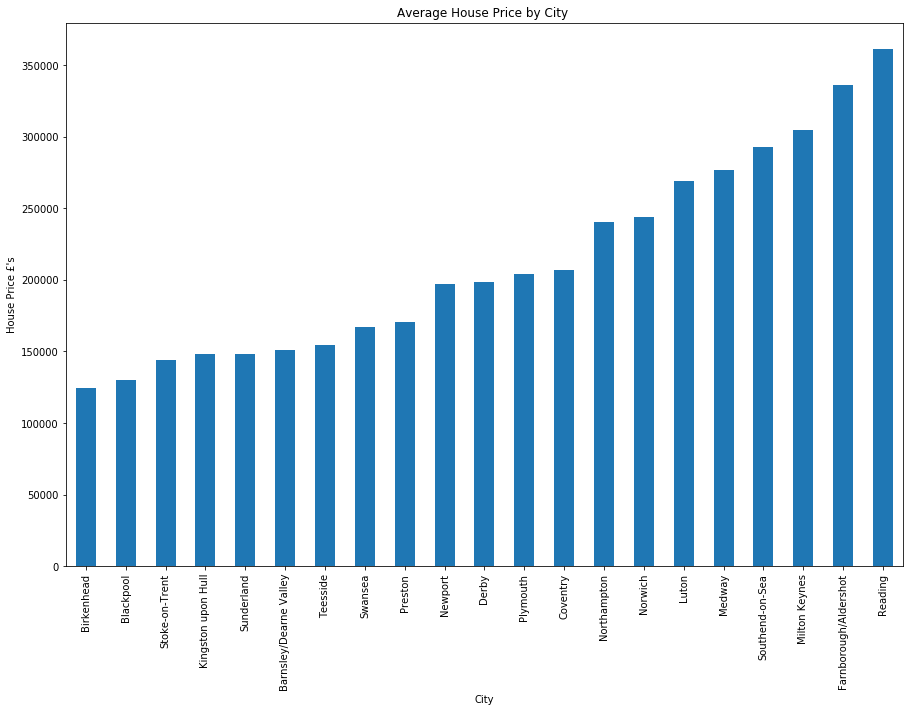

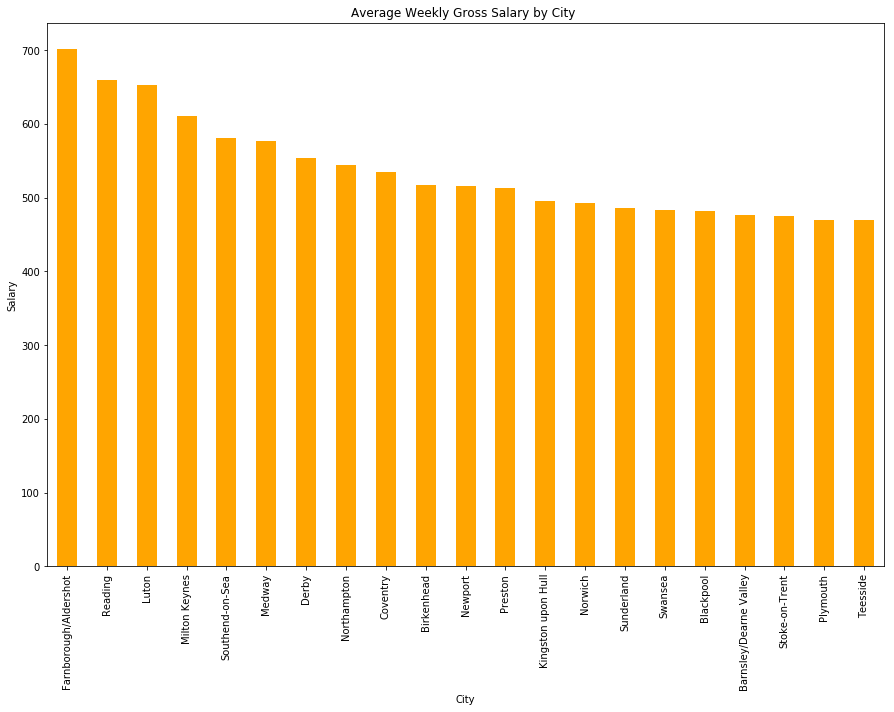

Complete 2020-07-10 01:53:01.144429


In [181]:
# PLot Houses  Cost by City
df=df.sort_values(by=['Cost'])
df.plot(x ='Area', y='Cost', kind = 'bar', figsize=(15, 10),legend=False)
plt.title ('Average House Price by City ')
plt.ylabel("House Price £'s")
plt.xlabel('City')

#Insert the postion to the df_final dataframe
df_a=df[['Area']]
df_a.reset_index(inplace=True)
#df_a=df_a.drop('index')
df_a.reset_index(inplace=True)
df_a.rename({ 'level_0': 'House Price'}, axis=1, inplace=True)
df_final=df_a[['Area','House Price']]


#PLot salary
df=df.sort_values(by=['Mean'], ascending=False)
df.plot(x ='Area', y='Mean', kind = 'bar', figsize=(15, 10),legend=False, color='orange')
plt.title ('Average Weekly Gross Salary by City ')
plt.figsize=(20, 10)
plt.ylabel('Salary')
plt.xlabel('City')
plt.show()

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


Complete 2020-07-10 01:53:01.667965


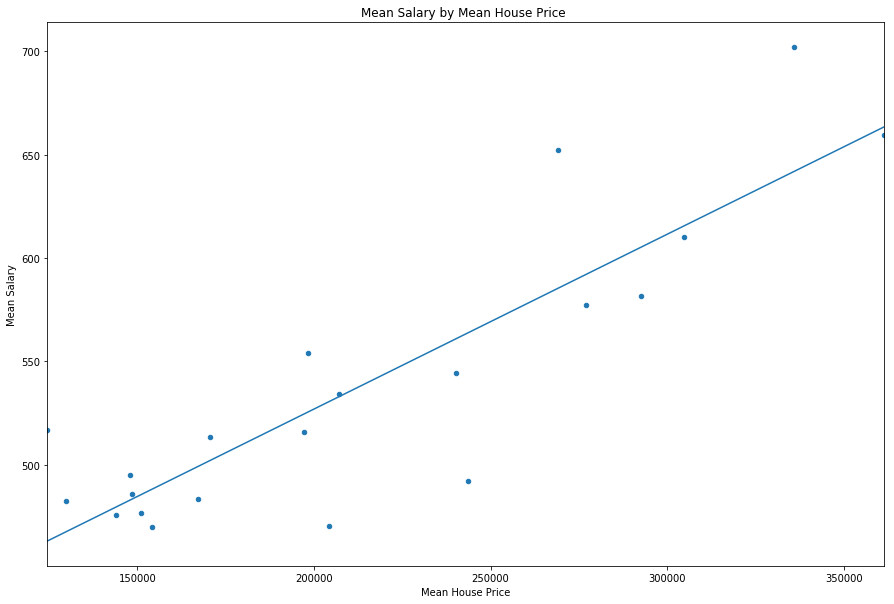

In [182]:
# Plot salaries against house prices fit regression line
df1=df
z = np.polyfit(x=df1.loc[:,'Cost'], y=df1.loc[:,'Mean'], deg=1)
p = np.poly1d(z)
df1['trendline'] = p(df1.loc[:,'Cost'])
ax = df1.plot.scatter(x='Cost', y='Mean', figsize=(15, 10),legend=False)
df1.set_index('Cost', inplace=True)
df1.trendline.sort_index(ascending=False).plot(ax=ax)
plt.gca()
plt.title ('Mean Salary by Mean House Price ')
plt.ylabel('Mean Salary')
plt.xlabel('Mean House Price')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


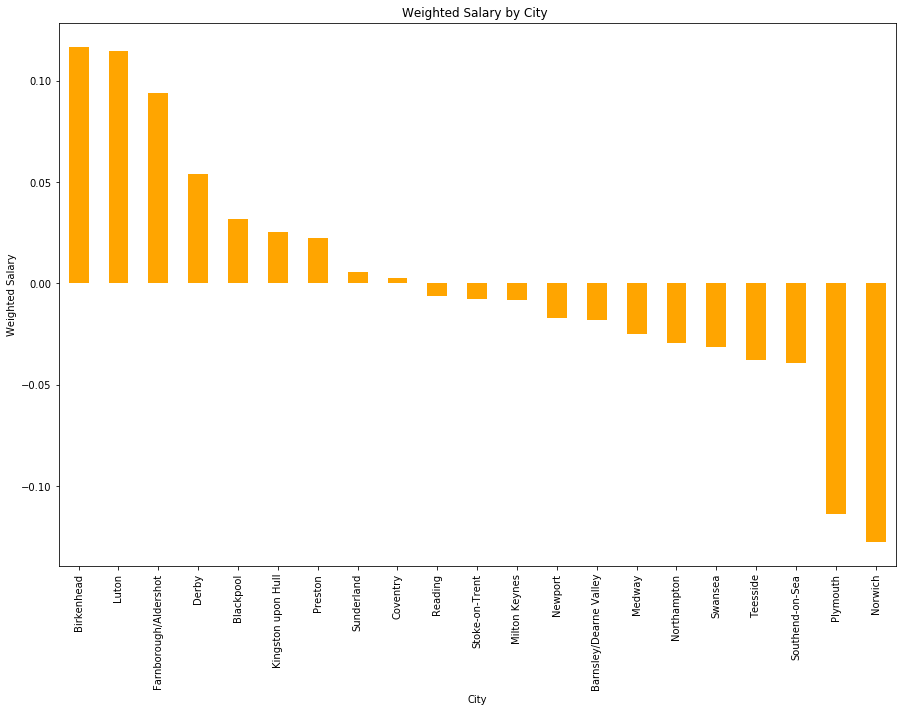

Complete 2020-07-10 01:53:03.825324


In [183]:
#Calulate the weight salary above the trendline = (Mean[salary]-trendline/trendline)
df_a=df1[['Area','Mean','trendline']]
df_a['diff'] = df1['Mean'].sub(df1['trendline']).to_frame('diff')
df_a['weight']= df_a['diff'].div(df_a['trendline']).to_frame('weight')
df_d=df_a.sort_values(by=['weight'],ascending=False)

# Plot weighted average by city
df_d.plot(x ='Area', y='weight', kind = 'bar', figsize=(15, 10),legend=False, color='orange')
plt.title ('Weighted Salary by City ')
plt.ylabel('Weighted Salary')
plt.xlabel('City')
plt.show()

#add position to final dataframe
df_d.reset_index(inplace=True)
df_d.reset_index(inplace=True)
df_d=df_d[['Area','index']]
df_d.rename({'index':'Salary'}, axis=1, inplace=True)
df_final = pd.merge(df_final, df_d, on='Area', how='inner')

# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)



/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


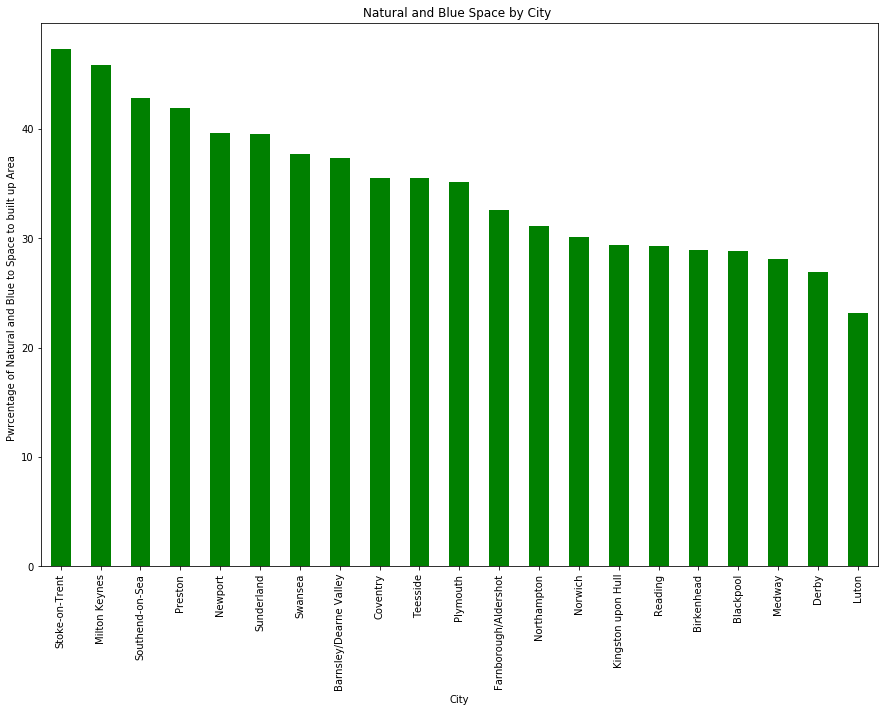

Complete 2020-07-10 01:53:06.346810


In [184]:
#  Add the natural space to the blue space and divide by city areato rank
df_a=df[['Area','Naturalspace','Bluespace','Built Up Area' ]]
df_a['TSpace'] = df['Naturalspace'].add(df['Bluespace']).to_frame('TSpace')
df_a['Weight'] = df_a['TSpace'].div(df_a['Built Up Area']).to_frame('Weight')
df_b=df_a.sort_values(by=['Weight'], ascending=False)

#plot percentage of  Natural and Blue Space by City
df_b.plot(x ='Area', y='Weight', kind = 'bar', figsize=(15, 10),legend=False, color='green')
plt.title ('Natural and Blue Space by City ')
plt.ylabel('Pwrcentage of Natural and Blue to Space to built up Area  ')
plt.xlabel('City')
plt.show()
df_b.reset_index(inplace=True)
df_b.reset_index(inplace=True)
df_b.rename({'index':'Space'}, axis=1, inplace=True)
df_c=df_b[['Area','Space']]
df_final = pd.merge(df_final, df_c, on='Area', how='inner')


# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


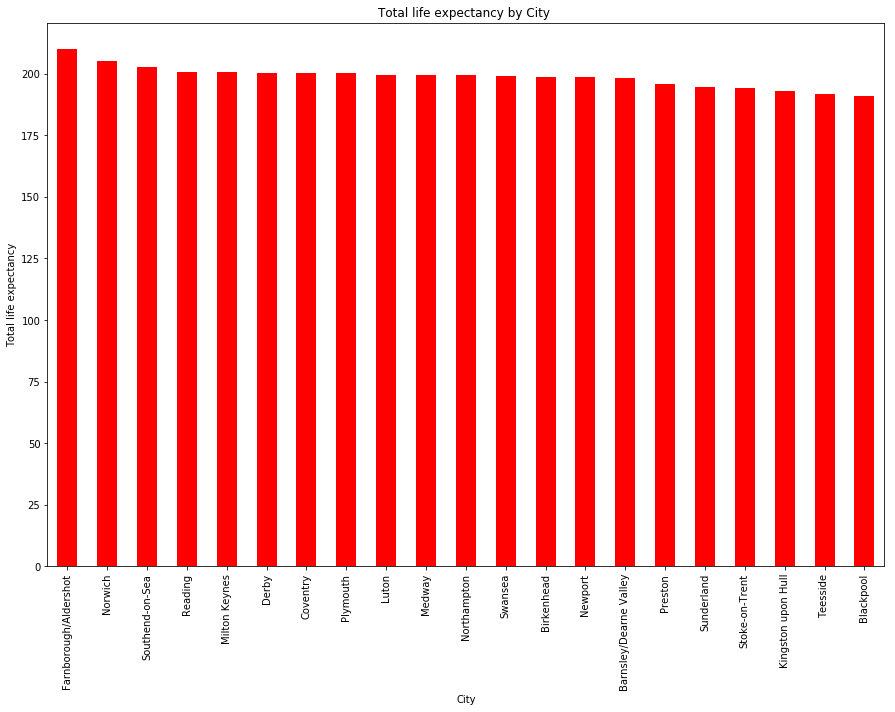

Complete 2020-07-10 01:53:07.414615


In [185]:
df_a=df[['Area','MLEB','MLE65','FLEB','FLE65' ]]
df_a['Totalage']=df_a['MLEB'].add(df_a['MLE65']).add(df_a['FLEB']).add(df_a['FLE65']).to_frame('Total')
df_a=df_a.sort_values(by=['Totalage'], ascending=False)
df_a.plot(x ='Area', y='Totalage', kind = 'bar', figsize=(15, 10),color='red',legend=False)
plt.title ('Total life expectancy by City ')
plt.ylabel('Total life expectancy')
plt.xlabel('City')
plt.show()

df_a.reset_index(inplace=True)
df_a.reset_index(inplace=True)
df_a.rename({'index':'Life'}, axis=1, inplace=True)
df_c=df_a[['Area','Life']]
df_final = pd.merge(df_final, df_c, on='Area', how='inner')


# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

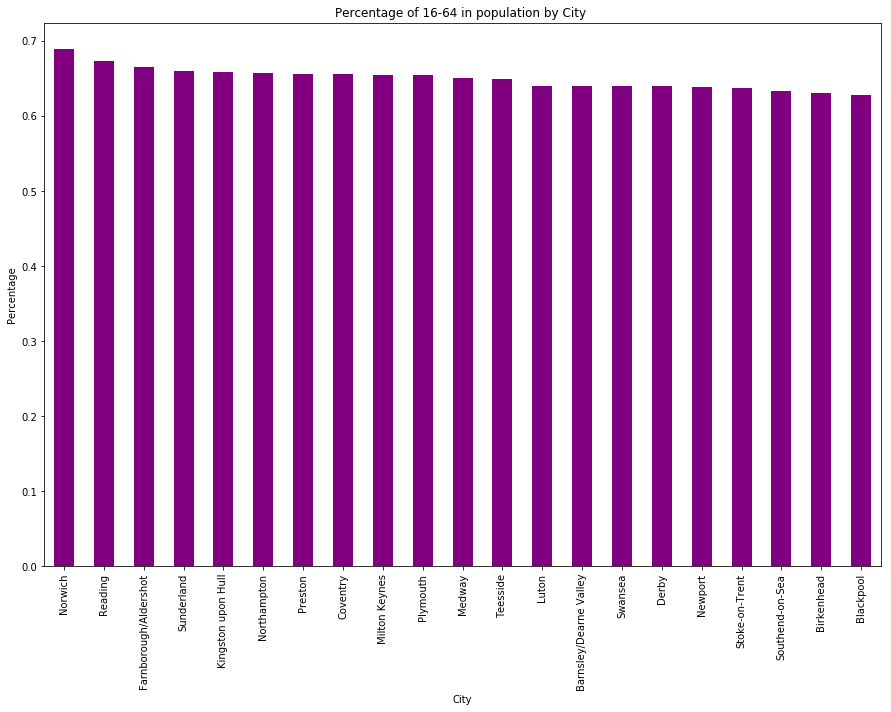

Complete 2020-07-10 01:53:10.170331


In [186]:
# Find the perecntage of 16-64 years olds (add no of male and female divided by the total sum)
df_a=df[['Area','m16-64','f16-64','mtot','ftot' ]]
df_a['m16-64']=df_a['m16-64'].astype(int)
df_a['f16-64']=df_a['f16-64'].astype(int)
df_a['ftot']=df_a['ftot'].astype(int)
df_a['mtot']=df_a['mtot'].astype(int)
df_a['T16-64']=df_a['m16-64'].add(df_a['f16-64']).to_frame('T')
df_a['tot']=df_a['mtot'].add(df_a['mtot']).to_frame('T')
df_a['weight']=df_a['T16-64'].div(df_a['tot']).to_frame('Total')
df_a=df_a.sort_values(by=['weight'], ascending=False)
df_a.plot(x ='Area', y='weight', kind = 'bar',figsize=(15, 10),color='purple',legend=False)
plt.title ('Percentage of 16-64 in population by City ')
plt.ylabel('Percentage')
plt.xlabel('City')
plt.show()

#Add the postion to the df_final dataframe
df_a.reset_index(inplace=True)
df_a.reset_index(inplace=True)
df_a.rename({'index':'16-65'}, axis=1, inplace=True)
df_c=df_a[['Area','16-65']]
df_final = pd.merge(df_final, df_c, on='Area', how='inner')


# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


In [187]:
df_a=df[['Area','Golf Courses','Sushi Restaurants','Music Venues','Gyms','pop']]

search_code= ['Golf Courses','Sushi Restaurants','Music Venues','Gyms' ]
position_code= ['Golf','Sushi','Music','Gym' ]

#As some areas have no Sushi restauants add 0.1 to number of Sushi Restaurants so we have no equl last
df_a['Sushi Restaurants']=df_a['Sushi Restaurants'].add(.1).to_frame('Total')

df_a.reset_index(inplace=True)
#Create columns 'Golf','Sushi','Music','Gym' which will be the position of eahc area in terms of nnumber of facilities / populatio
for j in range(4):
    search=search_code[j]
    position=position_code[j]
    df_a['weight']=df_a[search].div(df_a['pop']).to_frame('Total')
    df_a=df_a.sort_values(by=['weight'], ascending=False)
    df_a.reset_index(inplace=True)
    del df_a['index']
    df_a.reset_index(inplace=True)
    df_a.rename({'index':position}, axis=1, inplace=True)
df_feat=df_a[['Area','Golf','Sushi','Music','Gym'] ]


df_feat['Tot_Features']=df_feat['Golf'].add(df_feat['Sushi']).add(df_feat['Music']).add(df_feat['Gym']).to_frame('Total')

df_feat=df_feat.sort_values(by=['Tot_Features'])

# Add Amenities to df_final dataframe
df_feat.reset_index(inplace=True)
del df_feat['index']
df_feat.reset_index(inplace=True)
#df_feat.reset_index(inplace=True)
df_feat.rename({'index':'Amenities', 'Area':'City'}, axis=1, inplace=True)
df_c=df_feat[['City','Amenities']]
df_final.rename({'Area':'City'}, axis=1, inplace=True)
df_final = pd.merge(df_final, df_c, on='City', how='inner')
df_feat.set_index('City',inplace=True)
# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Complete 2020-07-10 01:53:10.794748


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'City Rank by Amenities')

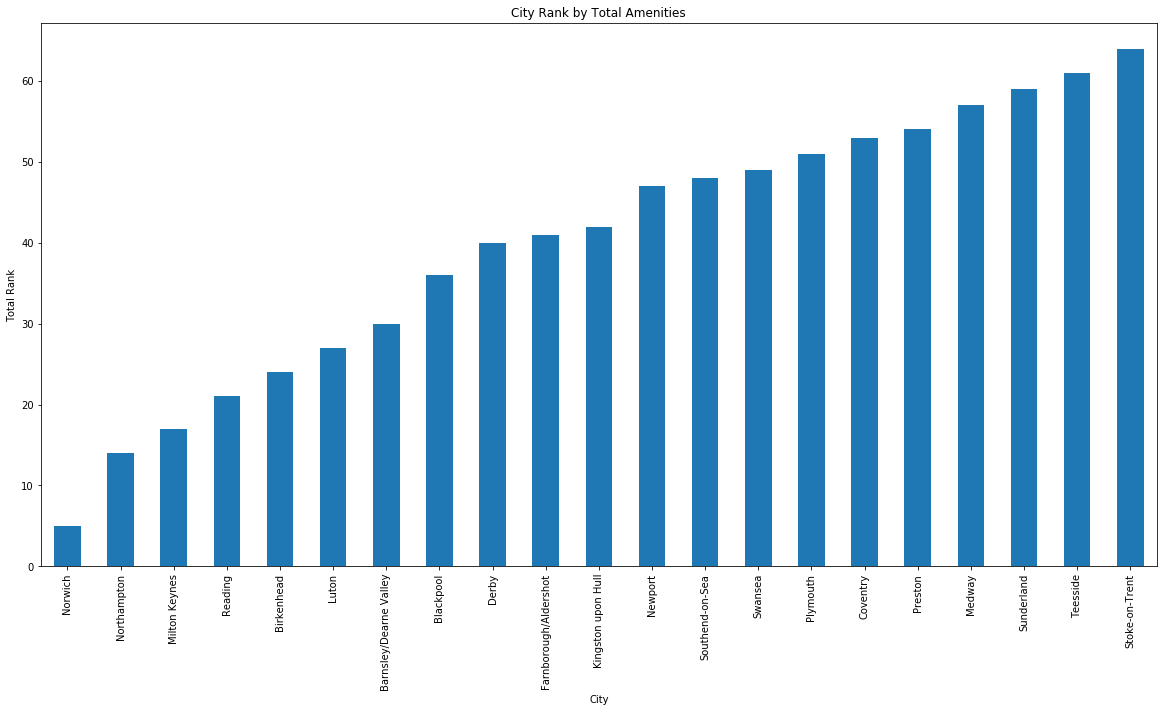

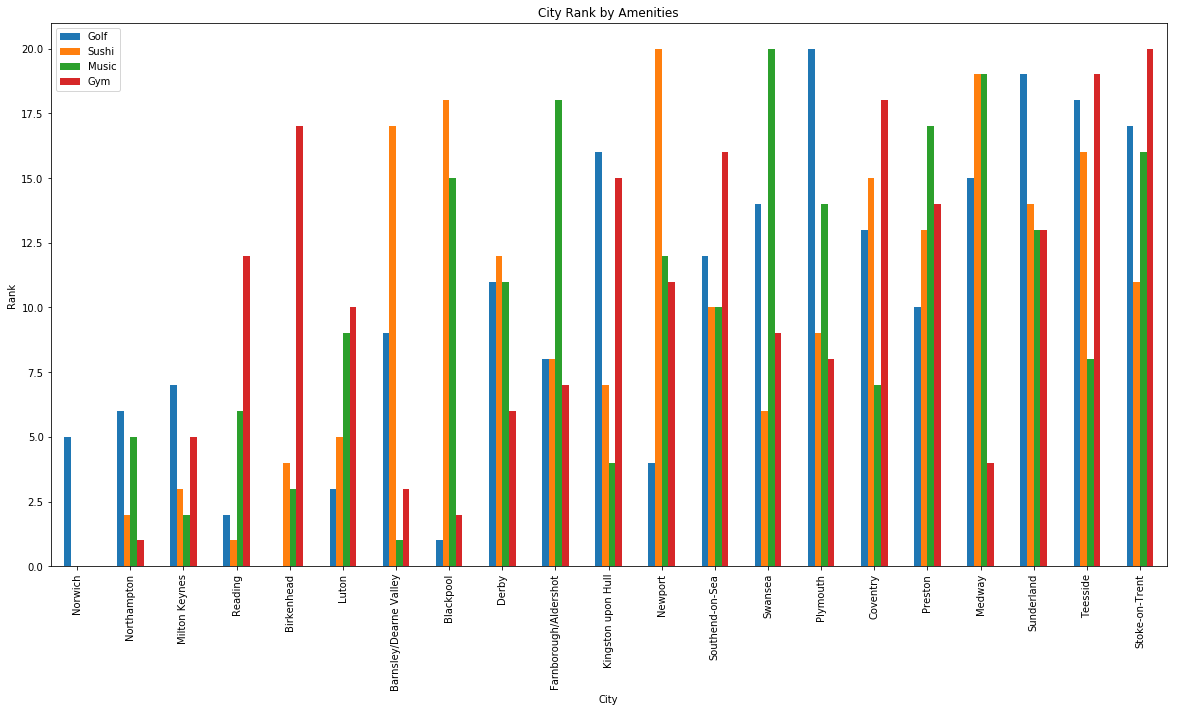

In [188]:

df_a=df_feat['Tot_Features']

ax=df_a.plot(kind='bar', figsize=(20, 10))
ax.set_ylabel("Total Rank")
ax.set_title('City Rank by Total Amenities')


df_feat=df_feat.drop(['Amenities'], axis=1)
df_feat=df_feat.drop(['Tot_Features'], axis=1)
ax=df_feat.plot(kind='bar', figsize=(20, 10) )
ax.set_ylabel("Rank")
ax.set_title('City Rank by Amenities')


                        House Price  Salary  Space  Life  16-65  Amenities  \
City                                                                         
Farnborough/Aldershot            19       2     11     0      2          9   
Milton Keynes                    18      11      1     4      8          2   
Norwich                          14      20     13     1      0          0   
Birkenhead                        0       0     16    12     19          4   
Reading                          20       9     15     3      1          3   
Sunderland                        4       7      5    16      3         18   
Preston                           8       6      3    15      6         16   
Kingston upon Hull                3       5     14    18      4         10   
Coventry                         12       8      8     6      7         15   
Northampton                      13      15     12    10      5          1   
Barnsley/Dearne Valley            5      13      7    14     13 

Text(0.5, 1.0, 'City Rank by all dimensions')

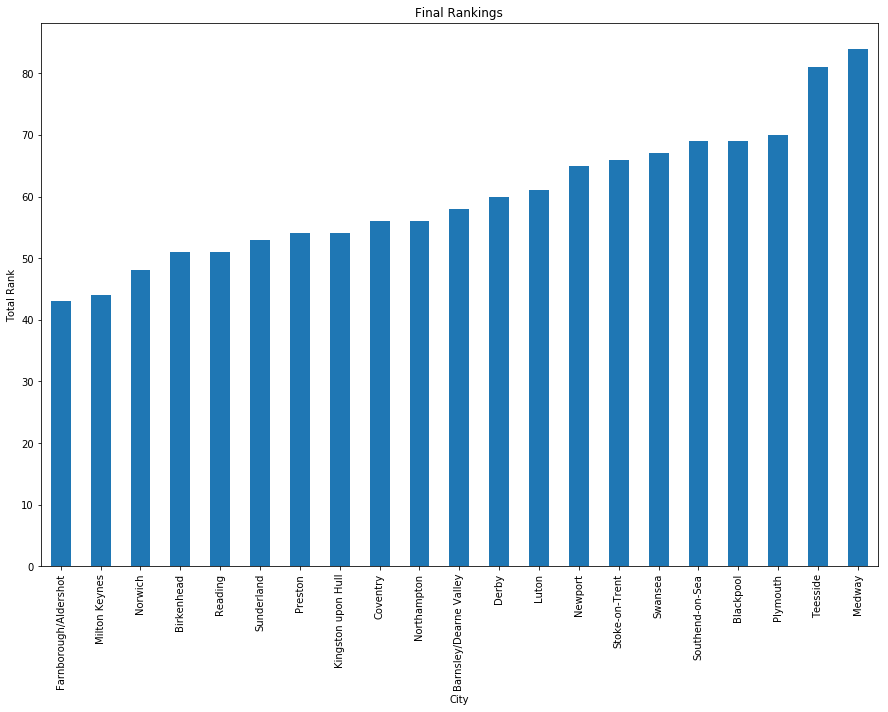

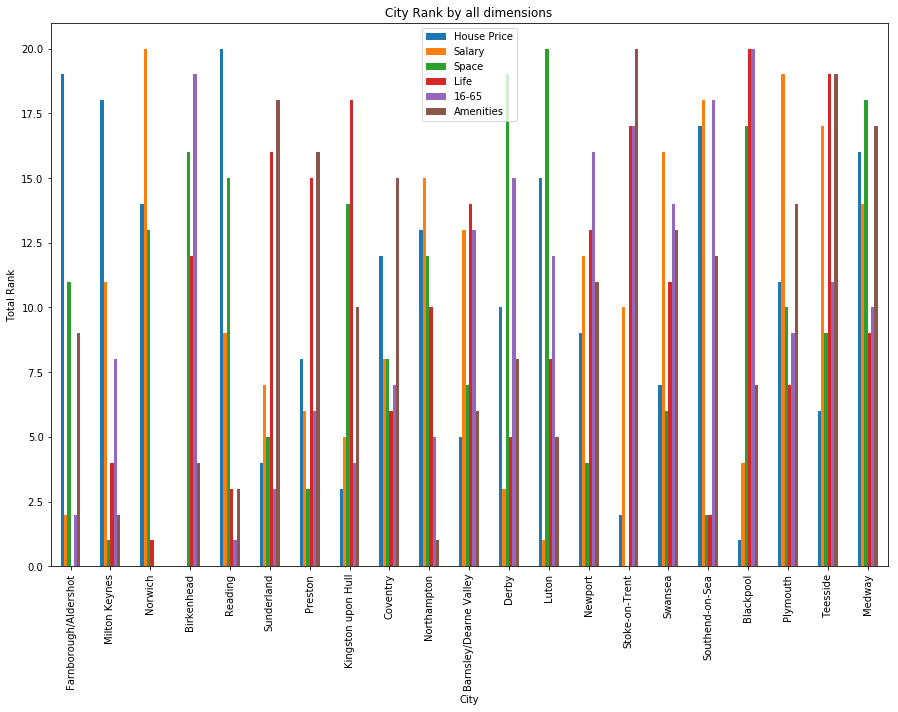

In [189]:




df_final['Total']=df_final['Salary'].add(df_final['House Price']).add(df_final['Space']).add(df_final['Life']).add(df_final['16-65']).add(df_final['Amenities']).to_frame('Total')
df_final=df_final.sort_values(by=['Total'])

df_final.set_index('City',inplace=True)
#df_final=df_final.drop(['index'], axis=1)
print(df_final)

df_a=df_final['Total']
ax=df_a.plot(kind='bar', figsize=(15, 10))
ax.set_ylabel("Total Rank")
ax.set_title('Final Rankings')


df_final=df_final.drop(['Total'], axis=1)
ax=df_final.plot(kind='bar', figsize=(15, 10))
ax.set_ylabel("Rank")
ax.set_title('City Rank by all dimensions')


Text(0.5, 1.0, 'City Rank by all dimensions')

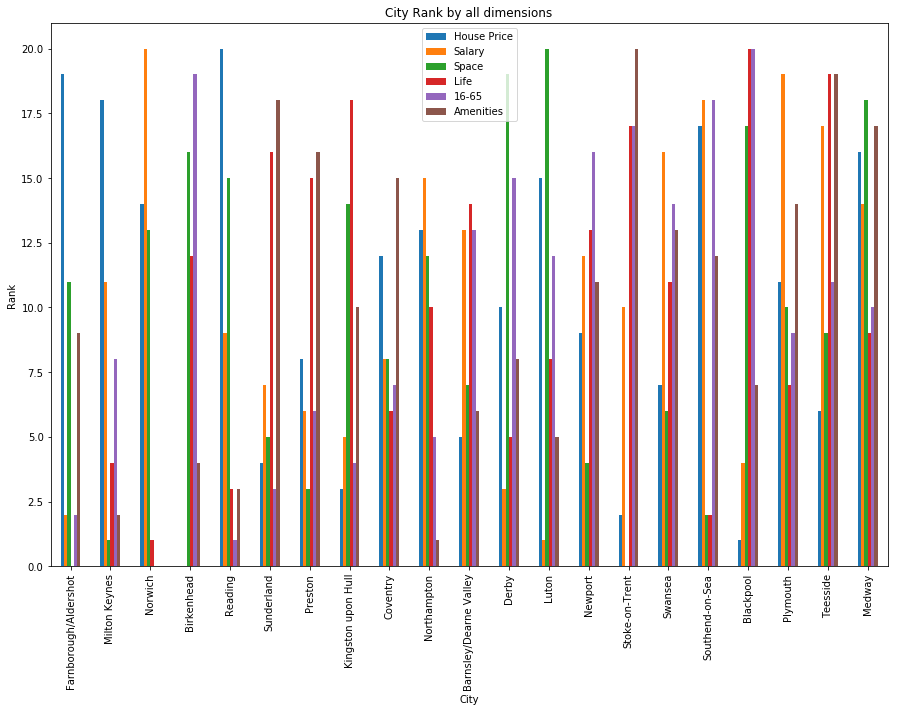

In [190]:
ax=df_final.plot(kind='bar', figsize=(15, 10))
ax.set_ylabel("Rank")
ax.set_title('City Rank by all dimensions')

                      City  House Price  Salary  space  Life  16-65  \
0    Farnborough/Aldershot           19       2     11     0      2   
1           Milton Keynes            18      11      1     4      8   
2                  Norwich           14      20     13     1      0   
3               Birkenhead            0       0     16    12     19   
4                  Reading           20       9     15     3      1   
5               Sunderland            4       7      5    16      3   
6                  Preston            8       6      3    15      6   
7       Kingston upon Hull            3       5     14    18      4   
8                 Coventry           12       8      8     6      7   
9              Northampton           13      15     12    10      5   
10  Barnsley/Dearne Valley            5      13      7    14     13   
11                   Derby           10       3     19     5     15   
12                   Luton           15       1     20     8     12   
13    

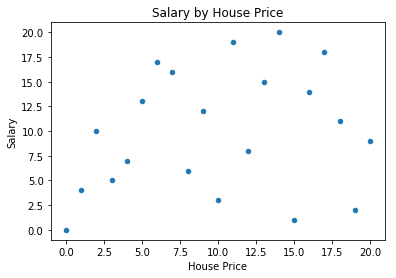

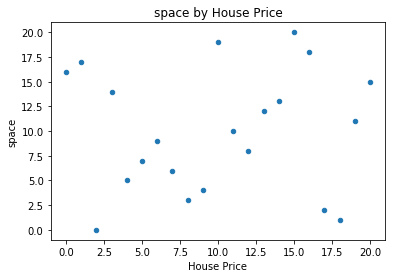

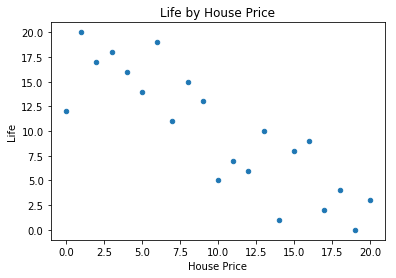

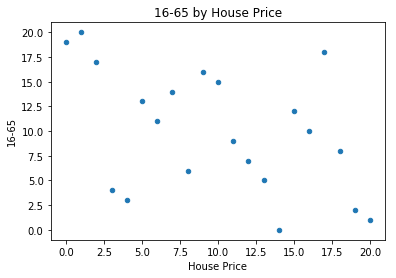

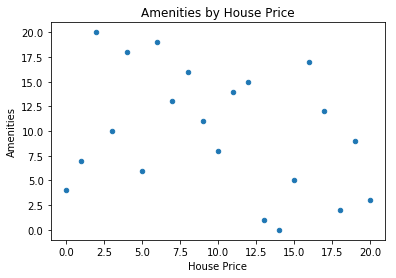

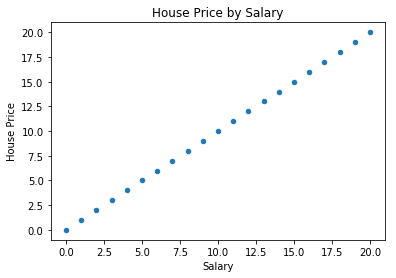

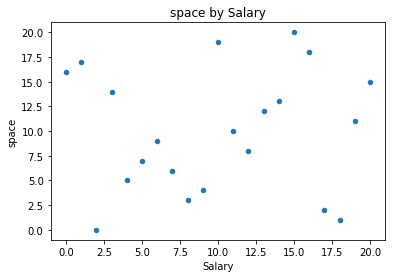

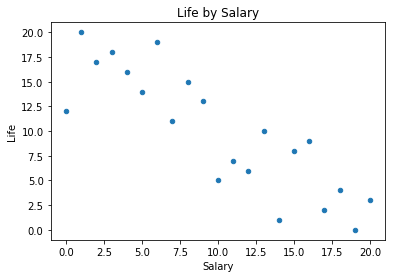

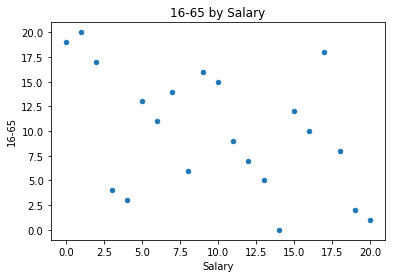

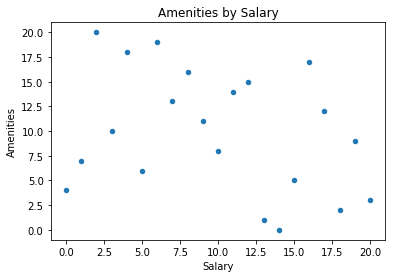

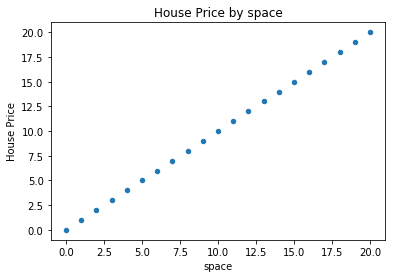

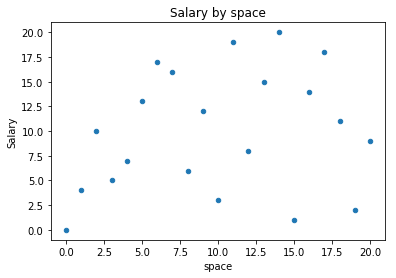

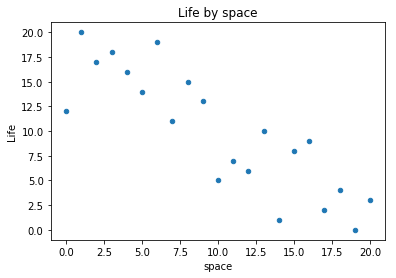

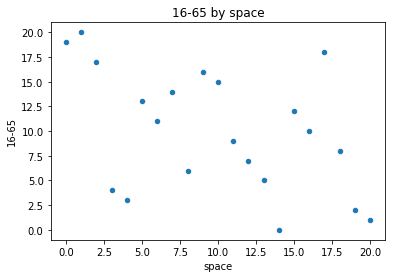

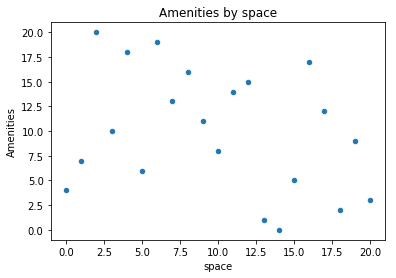

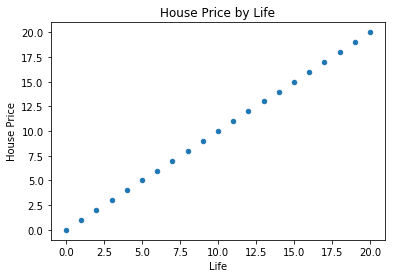

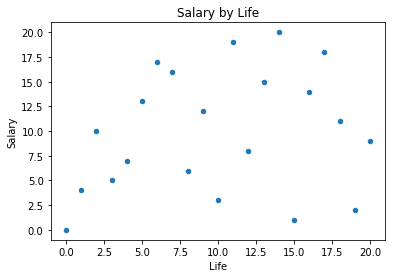

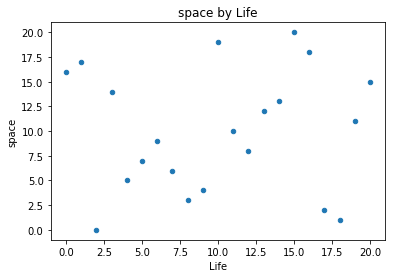

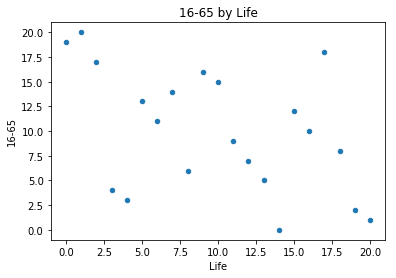

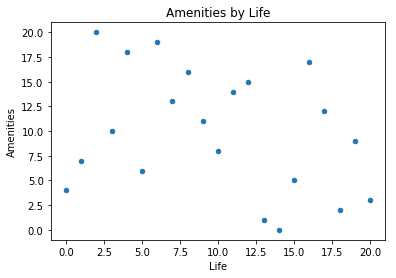

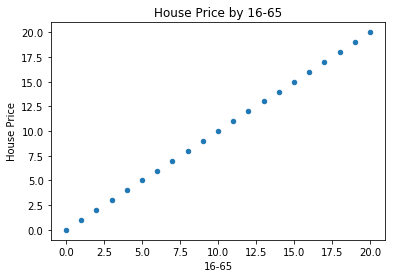

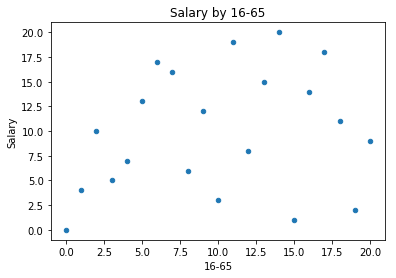

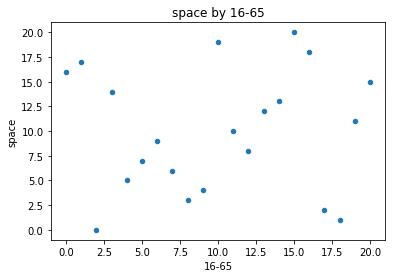

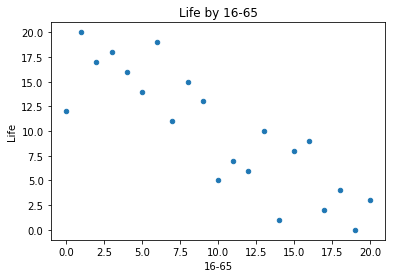

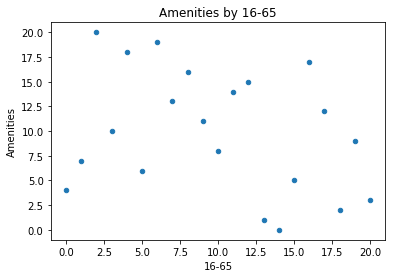

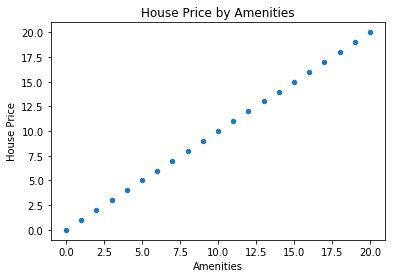

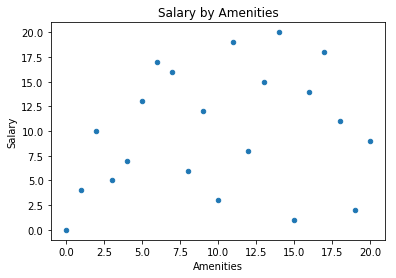

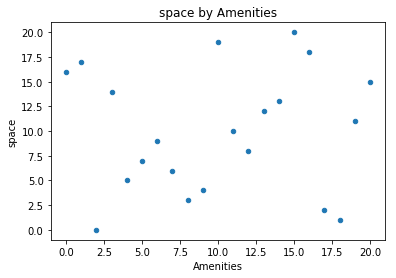

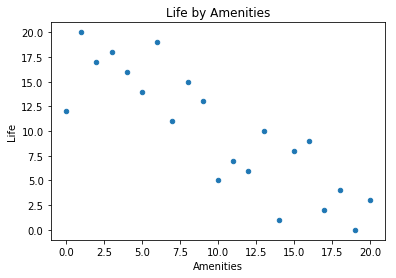

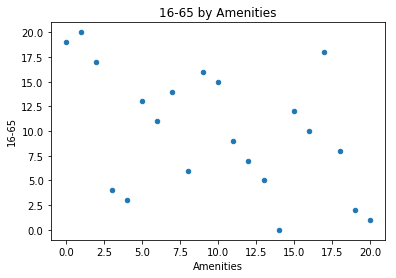

In [74]:
# Read ONS data set salaries 
body = client_998393dae2c24765b554a50c1abde197.get_object(Bucket='mickdatascience-donotdelete-pr-idf4kzdaw5vh27',Key='finalscore.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_lst = pd.read_csv(body)
headings =['House Price','Salary','space','Life','16-65','Amenities']
for i in range (6):
    for  j in range(6):
        x_axis=headings[i]
        y_axis=headings[j]
        if x_axis != y_axis:
            df_lst['sorti']=df_lst[x_axis]
            z = np.polyfit(x=df_lst.loc[:,sorti], y=df_lst.loc[:,y_axis], deg=1)
            p = np.poly1d(z)
           # df_lst['trendline'] = p(df_lst.loc[:,sorti])
            ax = df_lst.plot.scatter(x=sorti, y=y_axis, legend=False)
           # df_lst.set_index('sorti', inplace=True)
           # df_lst.trendline.sort_index(ascending=False).plot(ax=ax)
            #plt.gca()
            title_1=y_axis + ' by ' + x_axis
            plt.title (title_1)
            plt.ylabel(y_axis)
            plt.xlabel(x_axis)

           
        
print(df_lst)
# Show compeleted time
x = datetime.datetime.now()
print('Complete',x)


In [47]:

df_save['LE']=df_save['MLEB'].add(df_save['MLE65']).add(df_save['FLEB']).add(df_save['FLE65']).to_frame('Total')
df_save['SPACE']=df_save['Bluespace'].add(df_save['Naturalspace']).to_frame('Total')
df_save['totalage']=df_save['mtot'].add(df_save['ftot']).to_frame('Total')
df_save['16-64']=df_save['m16-64'].add(df_save['f16-64']).to_frame('Total')
#df_save['WSPACE']=df_save['SPACE'].div(df_save['Built Up Area']).to_frame('Total')
#df_save['W16-64']=df_save['16-64'].div(df_save['totalage']).to_frame('Total')
#df_save['WGolf']=df_save['Golf Courses'].div(df_save['pop']).to_frame('Total')
df_save=df_save.drop(['Density','Median','Coastal','Naturalspace','Bluespace','MLEB','FLEB','MLE65','FLE65','m16-64','m65+','m85+','mtot','f16-64','f65+','f85+','ftot'],axis=1)
print(df_save)

    Built Up Area       pop                    Area  Golf Courses  \
0           108.2  376633.0                Teesside          10.0   
1           103.9  372775.0          Stoke-on-Trent          11.0   
2            81.3  359262.0                Coventry          12.0   
3            83.5  335415.0              Sunderland           6.0   
4            88.2  325264.0              Birkenhead          29.0   
5            83.7  318014.0                 Reading          23.0   
6            82.6  314018.0      Kingston upon Hull          10.0   
7            82.4  313322.0                 Preston          14.0   
8            84.2  306844.0                 Newport          19.0   
9            87.6  300352.0                 Swansea          10.0   
10           71.8  295310.0         Southend-on-Sea          12.0   
11           64.1  270468.0                   Derby          11.0   
12           59.7  260203.0                Plymouth           4.0   
13           50.7  258018.0       